# Búsqueda de subsecuencias 

In [5]:
import random
import numpy as np
from tslearn.metrics import dtw, dtw_path

In [33]:
print(np.__version__)

1.22.1


### Creamos y representamos una serie de secuencias

In [34]:
array1=np.zeros(500)
array2=np.zeros(500)
serie2=[2,455,623,7,44,2,513,321,67,899,566,6,4,345,44,56,567,321,4,34,456,65,67,788,8,9,432,546,563,4,232,5]

#Se crean unos arrays para añadir ruido antes y después de la secuencia 
for i in range(500):
    array1[i]=random.randrange(1000)
    array2[i]=random.randrange(1000)

#Concatenamos
serie1=np.concatenate((array1,serie2,array2), axis=None)

print("Secuencia con ruido: ",serie1)
print("Secuencia de prueba: ",serie2)

Secuencia con ruido:  [551. 525. 902. ... 694. 313. 568.]
Secuencia de prueba:  [2, 455, 623, 7, 44, 2, 513, 321, 67, 899, 566, 6, 4, 345, 44, 56, 567, 321, 4, 34, 456, 65, 67, 788, 8, 9, 432, 546, 563, 4, 232, 5]


(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

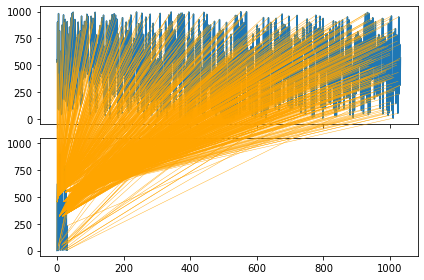

In [35]:
#Representar las series
from dtaidistance import dtw
from dtaidistance import dtw_visualisation

path = dtw.warping_path(serie1, serie2)
dtw_visualisation.plot_warping(serie1, serie2, path)
#print(path)

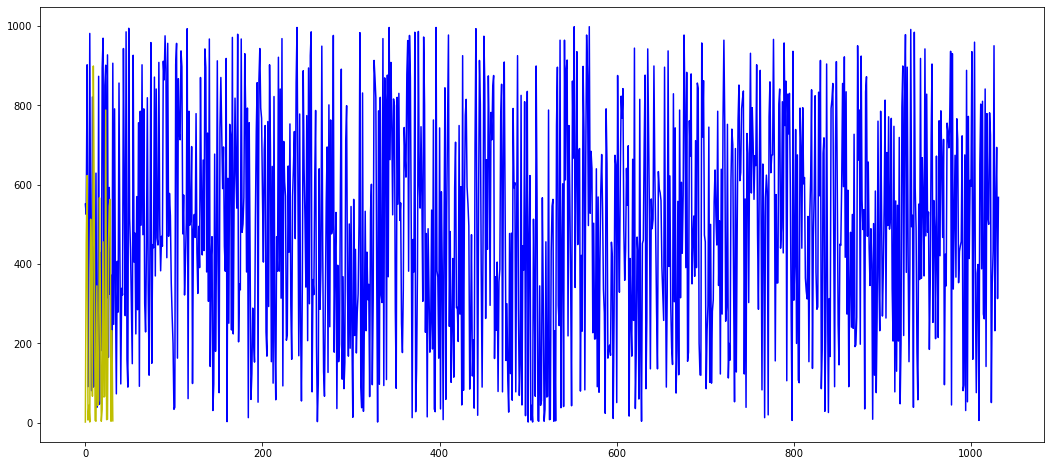

In [36]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(18, 8))

plt.plot(serie1, "b-", label='First time series')
plt.plot(serie2, "y-", label='Second time series')

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

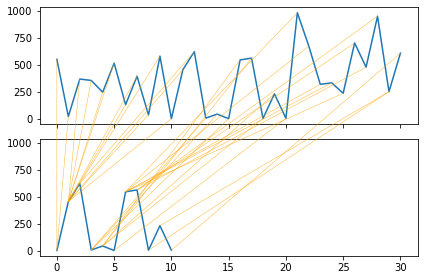

In [37]:
#Prueba con datos más pequeños

array1_menor=np.zeros(10)
array2_menor=np.zeros(10)
serie2_menor=[2,455,623,7,44,2,546,563,4,232,5]

for i in range(10):
    array1_menor[i]=random.randrange(1000)
    array2_menor[i]=random.randrange(1000)
    

#Concatenamos
serie1_menor=np.concatenate((array1_menor,serie2_menor,array2_menor), axis=None)

path = dtw.warping_path(serie1_menor, serie2_menor)
dtw_visualisation.plot_warping(serie1_menor, serie2_menor, path)

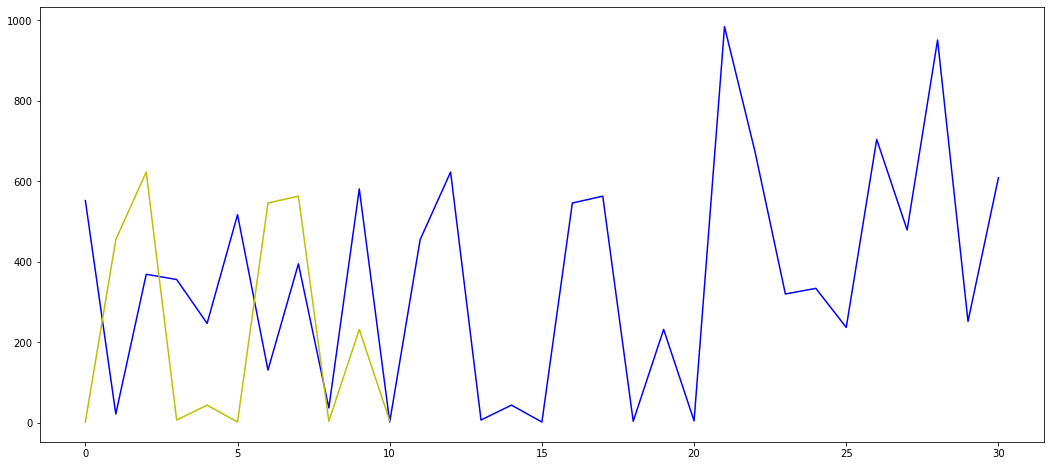

In [38]:
plt.figure(1, figsize=(18, 8))

plt.plot(serie1_menor, "b-", label='First time series')
plt.plot(serie2_menor, "y-", label='Second time series')

## Encontrar una secuencia dentro de otra de tamaño mayor

El objetivo es encontrar una subsecuencia dentro de la secuencia más larga que se ajuste de manera óptima a la secuencia más corta.

Se tenrán en cuenta los siguientes parámetros:
-    M > N Siendo ambas el tamaño de las series más larga y más corta respectivamente
-    a* y b* serán los índices que representan el princio y el final de la subsecuencia dentro de Y
-    1 <= a* <= b* <= M 
-    X es el patrón de referencia e Y la secuencia más larga a analizar
-    p* será la ruta de deformación resultante
-    pl = (a*,1) con l∈{1,...,L}

El procedimiento será el siguiente:
-    Obtener el coste, para ello la posición inicial de la subsecuencia a* no proporcionará ningún valor excepto su propio coste. El coste de b* dependerá únicamente de DTW. El resto de valores de la matriz de costes acumulados D se define como en el algoritmo básico DTW
-    b∗ = arg minb=1,...,M D(N,b)
-    a* se obtiene aplicando el algoritmo óptimo de ruta de deformación enpezando por la posición (N,b*)
-    p* pasará de p∗=(p1,...,pL) a (pl,...,pL)
    


### dtaidistance

#### Conjunto de datos menor 

In [39]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

d, paths = dtw.warping_paths(serie2_menor, serie1_menor, window=25, psi=2)
best_path = dtw.best_path(paths)
#best_path
best_path=np.array(best_path)
a_ast = best_path[1, 1]
b_ast = best_path[-1, 1]

print("a* =",a_ast)
print("b* =",b_ast)
print("La subsecuencia que debería encontrar es: [2,455,623,7,44,2,546,563,4,232,5]")
serie1_menor[a_ast:b_ast+1]

a* = 2
b* = 29
La subsecuencia que debería encontrar es: [2,455,623,7,44,2,546,563,4,232,5]


array([369., 356., 247., 517., 131., 395.,  37., 581.,   2., 455., 623.,
         7.,  44.,   2., 546., 563.,   4., 232.,   5., 984., 674., 320.,
       334., 237., 704., 479., 951., 252.])

<div class="alert alert-block alert-danger">
    Devuelve una subsecuencia en la que se encuentra el patrón de referencia, pero hay demasiados valores antes y después de dicho patrón
</div>

#### Conjunto de datos mayor

In [40]:
#Probamos con el conjunto de 
d, paths = dtw.warping_paths(serie2, serie1, window=25, psi=2)
best_path = dtw.best_path(paths)
#best_path
best_path=np.array(best_path)
a_ast = best_path[1, 1]
b_ast = best_path[-1, 1]

print("a* =",a_ast)
print("b* =",b_ast)
print("La subsecuencia que debería encontrar es: [2,455,623,7,44,2,546,563,4,232,5]")
serie1[a_ast:b_ast+1]

a* = 1
b* = 1030
La subsecuencia que debería encontrar es: [2,455,623,7,44,2,546,563,4,232,5]


array([525., 902.,  91., ..., 550., 694., 313.])

<div class="alert alert-block alert-danger">
    Saca una secuencia excesivamente larga. Esta técnica no se puede aplicar para conjuntos de datos de gran tamaño
</div>

### tslearn

#### Conjunto de datos menor 

In [41]:
from tslearn.metrics import dtw_subsequence_path

path, dist = dtw_subsequence_path(serie2_menor, serie1_menor)
print(path)
print(dist)

path=np.array(path)
a_ast = path[0, 1]
b_ast = path[-1, 1]

print("a* =",a_ast)
print("b* =",b_ast)
print("La subsecuencia que debería encontrar es: [2,455,623,7,44,2,546,563,4,232,5]")
serie1_menor[a_ast:b_ast+1]

[(0, 10), (1, 11), (2, 12), (3, 13), (4, 14), (5, 15), (6, 16), (7, 17), (8, 18), (9, 19), (10, 20)]
0.0
a* = 10
b* = 20
La subsecuencia que debería encontrar es: [2,455,623,7,44,2,546,563,4,232,5]


array([  2., 455., 623.,   7.,  44.,   2., 546., 563.,   4., 232.,   5.])

<div class="alert alert-block alert-success">
    Con una coleción de datos pequeña, encuentra el patrón a la perfección
</div>

In [42]:
path, dist = dtw_subsequence_path(serie2, serie1)
print(path)
print(dist)

path=np.array(path)
a_ast = path[0, 1]
b_ast = path[-1, 1]

print("a* =",a_ast)
print("b* =",b_ast)
print("La subsecuencia que debería encontrar es: [2,455,623,7,44,2,513,321,67,899,566,6,4,345,44,56,567,321,4,34,456,65,67,788,8,9,432,546,563,4,232,5]")
serie1[a_ast:b_ast+1]

[(0, 500), (1, 501), (2, 502), (3, 503), (4, 504), (5, 505), (6, 506), (7, 507), (8, 508), (9, 509), (10, 510), (11, 511), (12, 512), (13, 513), (14, 514), (15, 515), (16, 516), (17, 517), (18, 518), (19, 519), (20, 520), (21, 521), (22, 522), (23, 523), (24, 524), (25, 525), (26, 526), (27, 527), (28, 528), (29, 529), (30, 530), (31, 531)]
0.0
a* = 500
b* = 531
La subsecuencia que debería encontrar es: [2,455,623,7,44,2,513,321,67,899,566,6,4,345,44,56,567,321,4,34,456,65,67,788,8,9,432,546,563,4,232,5]


array([  2., 455., 623.,   7.,  44.,   2., 513., 321.,  67., 899., 566.,
         6.,   4., 345.,  44.,  56., 567., 321.,   4.,  34., 456.,  65.,
        67., 788.,   8.,   9., 432., 546., 563.,   4., 232.,   5.])

<div class="alert alert-block alert-success">
    Con una coleción de datos grande, encuentra el patrón a la perfección
</div>

Ahora vamos a probar a encontrar un patrón más pequeño dentro de una colección de datos de gran tamaño

In [44]:
serie1_2=np.concatenate((array1,serie2_menor,array2), axis=None)

path, dist = dtw_subsequence_path(serie2_menor, serie1_2)
print(path)
print(dist)

path=np.array(path)
a_ast = path[0, 1]
b_ast = path[-1, 1]

print("a* =",a_ast)
print("b* =",b_ast)
print("La subsecuencia que debería encontrar es: [2,455,623,7,44,2,546,563,4,232,5]")
serie1_2[a_ast:b_ast+1]

[(0, 500), (1, 501), (2, 502), (3, 503), (4, 504), (5, 505), (6, 506), (7, 507), (8, 508), (9, 509), (10, 510)]
0.0
a* = 500
b* = 510
La subsecuencia que debería encontrar es: [2,455,623,7,44,2,546,563,4,232,5]


array([  2., 455., 623.,   7.,  44.,   2., 546., 563.,   4., 232.,   5.])

<div class="alert alert-block alert-success">
    Con una coleción de datos grande y un secuencia de búsqueda algo menor, encuentra el patrón a la perfección
</div>

## Encontrar varias series temporales a partir de una de referencia

En esta ocasión se va a crear un patrón de referencia y a partir de él varias secuencias parecidas pero no iguales.
Lo que se pretende es comprobar si el algoritmo encuentra la subsecuencia más parecida al patrón de referencia.

In [46]:
#Patrón de referencia
pattern=[134.56, 454.56, 457.76, 56.67, 3.45, 345.4, 987.7, 45.66, 5.76]

#Subsecuencia más parecida (Cambiamos solo los decimales)
subsequence_1 = [134.76, 454.45, 457.81, 56.23, 3.04, 345.44, 987.27, 45.1, 5.41]

#Subsecuancia cambiando los decimales y dos valores enteros
subsequence_2 = [134.76, 454.45, 456.81, 56.23, 3.04, 345.44, 988.27, 45.1, 5.41]

#Subsecuancia cambiando los decimales y tres valores enteros
subsequence_3 = [134.76, 353.45, 456.81, 56.23, 3.04, 345.44, 988.27, 45.1, 5.41]

In [47]:
def initialize(n):
    sequence = np.zeros(n)
    
    for i in range(n):
        sequence[i] = round(random.uniform(1.55, 999.95),2)
        
    return sequence

sequence_1 = initialize(500)
sequence_2 = initialize(500)
sequence_3 = initialize(500)
sequence_4 = initialize(500)

large_sequence = np.concatenate((sequence_1,
                                 subsequence_3,
                                 sequence_2,
                                 subsequence_2,
                                 sequence_3,
                                 subsequence_1,
                                 sequence_4), axis=None)



#Crearemos también un conjunto de datos más pequeño para ver como funciona 

sequence_1_less = initialize(50)
sequence_2_less = initialize(50)
sequence_3_less = initialize(50)
sequence_4_less = initialize(50)

large_sequence_less = np.concatenate((sequence_1_less,
                                 subsequence_3,
                                 sequence_2_less,
                                 subsequence_2,
                                 sequence_3_less,
                                 subsequence_1,
                                 sequence_4_less), axis=None)

Primero se va a analizar si encuentra las secuencias más parecidas al patron

In [15]:
path, dist = dtw_subsequence_path(pattern, large_sequence)
print(path)
print(dist)

path=np.array(path)
a_ast = path[0, 1]
b_ast = path[-1, 1]

print("a* =",a_ast)
print("b* =",b_ast)
print("El patrón de referencia es: [134.56, 454.56, 457.76, 56.67, 3.45, 345.4, 987.7, 45.66, 5.76]")
print("La subsecuencia más parecida y la que debería encontrar es: [134.76, 454.45, 457.81, 56.23, 3.04, 345.44, 987.27, 45.1, 5.41]")
large_sequence[a_ast:b_ast+1]

[(0, 1518), (1, 1519), (2, 1520), (3, 1521), (4, 1522), (5, 1523), (6, 1524), (7, 1525), (8, 1526)]
1.0192644406629983
a* = 1518
b* = 1526
El patrón de referencia es: [134.56, 454.56, 457.76, 56.67, 3.45, 345.4, 987.7, 45.66, 5.76]
La subsecuencia más parecida y la que debería encontrar es: [134.76, 454.45, 457.81, 56.23, 3.04, 345.44, 987.27, 45.1, 5.41]


array([134.76, 454.45, 457.81,  56.23,   3.04, 345.44, 987.27,  45.1 ,
         5.41])

<div class="alert alert-block alert-success">
    Con una coleción de datos grande encuentra la secuencia más parecida al patrón de referencia 
</div>

In [16]:
path, dist = dtw_subsequence_path(pattern, large_sequence_less)
print(path)
print(dist)

path=np.array(path)
a_ast = path[0, 1]
b_ast = path[-1, 1]

print("a* =",a_ast)
print("b* =",b_ast)
print("El patrón de referencia es: [134.56, 454.56, 457.76, 56.67, 3.45, 345.4, 987.7, 45.66, 5.76]")
print("La subsecuencia más parecida y la que debería encontrar es: [134.76, 454.45, 457.81, 56.23, 3.04, 345.44, 987.27, 45.1, 5.41]")
large_sequence_less[a_ast:b_ast+1]

[(0, 168), (1, 169), (2, 170), (3, 171), (4, 172), (5, 173), (6, 174), (7, 175), (8, 176)]
1.0192644406629983
a* = 168
b* = 176
El patrón de referencia es: [134.56, 454.56, 457.76, 56.67, 3.45, 345.4, 987.7, 45.66, 5.76]
La subsecuencia más parecida y la que debería encontrar es: [134.76, 454.45, 457.81, 56.23, 3.04, 345.44, 987.27, 45.1, 5.41]


array([134.76, 454.45, 457.81,  56.23,   3.04, 345.44, 987.27,  45.1 ,
         5.41])

<div class="alert alert-block alert-success">
    Con una coleción de datos menor, encuentra la subsecuencia más parecida al patrón de referencia a la perfección
</div>

Ahora vamos a comprobar si encontraría solo la subsecuencia menos parecida 

In [32]:
sequence_5 = initialize(500)
sequence_6 = initialize(500)
sequence_7 = initialize(500)

large_sequence_2 = np.concatenate((sequence_5,
                                subsequence_3,
                                 sequence_6), axis=None)

path, dist = dtw_subsequence_path(pattern, large_sequence_2)
print(path)
print(dist)

path=np.array(path)
a_ast = path[0, 1]
b_ast = path[-1, 1]

print("a* =",a_ast)
print("b* =",b_ast)
print("El patrón de referencia es: [134.56, 454.56, 457.76, 56.67, 3.45, 345.4, 987.7, 45.66, 5.76]")
print("La subsecuencia más parecida y la que debería encontrar es: [134.76, 344.45, 57.81, 56.23, 3.04, 345.44, 187.27, 45.1, 5.41]")
large_sequence_2[a_ast:b_ast+1]

[(0, 500), (1, 501), (2, 502), (3, 503), (4, 504), (5, 505), (6, 506), (7, 507), (8, 508)]
101.12022003536188
a* = 500
b* = 508
El patrón de referencia es: [134.56, 454.56, 457.76, 56.67, 3.45, 345.4, 987.7, 45.66, 5.76]
La subsecuencia más parecida y la que debería encontrar es: [134.76, 344.45, 57.81, 56.23, 3.04, 345.44, 187.27, 45.1, 5.41]


array([134.76, 353.45, 456.81,  56.23,   3.04, 345.44, 988.27,  45.1 ,
         5.41])

<div class="alert alert-block alert-success">
    Nuevamente vuelve a encontrar la subsecuencia más parecida al patrón de referencia aunque se alteren los valores de varios números
</div>

Lo que se va a plantear ahora es intentar encontrar varias subsecuencias similares al patrón de referencia y almacenarlas todas en función del valor de DTW. Cuanto más se parezcan al patrón de referencia, antes se situarán en la lista.

In [50]:
def calcule_matrix(X,Y):
    
    # Matriz de distancias 
    C=np.zeros((len(X),len(Y)))

    for i in range(len(X)):
        for j in range(len(Y)):
            C[i][j] = abs((X[i]-Y[j])) #Para la distancia euclidea habría que elevar al cuadrado
            
    # Matriz de costes acumulados        
    D=np.zeros((len(X),len(Y)))
    D[:,0]=np.cumsum(C[:,0]) #inicialización de la primera columna
    D[0,:]=C[0,:] #Inicialización de la primera fila 

    for i in range(1,len(X)):
        for j in range(1,len(Y)):
            D[i][j] = C[i][j]+min(D[i-1][j],D[i][j-1],D[i-1][j-1])
    return C,D

C,D=calcule_matrix(pattern,large_sequence)
print("Matriz de distancias: ",C)
print("Matriz de costes acumulados: ",D)

Matriz de distancias:  [[ 52.9    9.95  35.66 ... 540.25 176.23 408.26]
 [267.1  310.05 355.66 ... 220.25 143.77  88.26]
 [270.3  313.25 358.86 ... 217.05 146.97  85.06]
 ...
 [800.24 843.19 888.8  ... 312.89 676.91 444.88]
 [141.8   98.85  53.24 ... 629.15 265.13 497.16]
 [181.7  138.75  93.14 ... 669.05 305.03 537.06]]
Matriz de costes acumulados:  [[  52.9     9.95   35.66 ...  540.25  176.23  408.26]
 [ 320.    320.    365.61 ...  760.5   320.    264.49]
 [ 590.3   633.25  678.86 ...  977.55  466.97  349.55]
 ...
 [1863.28 1863.28 1906.23 ... 1924.39 1739.95 1507.92]
 [2005.08 1962.13 1916.52 ... 2240.65 2005.08 2005.08]
 [2186.78 2100.88 2009.66 ... 2847.89 2310.11 2542.14]]


In [58]:
C,D=calcule_matrix(pattern,large_sequence_less)
print("Matriz de distancias: ",C)
print("Matriz de costes acumulados: ",D)

Matriz de distancias:  [[514.09 501.17  27.23 ...  70.57 762.37 379.86]
 [194.09 181.17 292.77 ... 249.43 442.37  59.86]
 [190.89 177.97 295.97 ... 252.63 439.17  56.66]
 ...
 [339.05 351.97 825.91 ... 782.57  90.77 473.28]
 [602.99 590.07 116.13 ... 159.47 851.27 468.76]
 [642.89 629.97 156.03 ... 199.37 891.17 508.66]]
Matriz de costes acumulados:  [[ 514.09  501.17   27.23 ...   70.57  762.37  379.86]
 [ 708.18  682.34  320.   ...  320.    512.94  439.72]
 [ 899.07  860.31  615.97 ...  572.63  759.17  496.38]
 ...
 [2778.55 2713.95 1888.95 ... 1670.66  978.86 1452.14]
 [3381.54 3304.02 2005.08 ... 1155.78 1830.13 1447.62]
 [4024.43 3933.99 2161.11 ... 1355.15 2046.95 1956.28]]


## BIBLIOGRAFÍA 

https://tslearn.readthedocs.io/en/stable/gen_modules/metrics/tslearn.metrics.lcss_path.html

LCSS
https://tslearn.readthedocs.io/en/stable/auto_examples/metrics/plot_lcss.html#sphx-glr-auto-examples-metrics-plot-lcss-py

CTW
https://tslearn.readthedocs.io/en/stable/auto_examples/metrics/plot_ctw.html#sphx-glr-auto-examples-metrics-plot-ctw-py

Sussequence Aligment
https://www.audiolabs-erlangen.de/resources/MIR/FMP/C7/C7S2_SubsequenceDTW.html

Subsecuencias
https://www.ntt-review.jp/archive/ntttechnical.php?contents=ntr201301ra1.html

Búsqueda de subsecuencia
https://www.audiolabs-erlangen.de/resources/MIR/FMP/C7/C7S2_SubsequenceDTW.html
https://beckassets.blob.core.windows.net/product/readingsample/190669/9783540740476_excerpt_001.pdf
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6928775/#B1-sensors-19-05192